# Assignment 2
In this assignment, you will write code to solve loop, conditional statement, and function related problems. All the tasks are related to a 2016 presidential debate transcript. After writing all the codes, save this notebook file (with .ipynb extension) and submit it through Elms.

Total Point: 70

## Data Loading [2]
In the [attached file](https://drive.google.com/file/d/1TKCHYYQ5VNi4J-wvjkar0W_NzO6qN7Tw/view?usp=sharing), you have a transcript to work with for this assignment. Upload it in your Google Drive and load the transcript as a Python file. Here is a [tutorial](https://drive.google.com/file/d/1GJKN9NCGqfxftSEbDivS3Zswg1Z-vlzC/view?usp=sharing) about how to load a Google Drive file using Python.

In [ ]:
file = open('/content/transcript').read()
print(file)

Lester Holt:  Good evening from Hofstra University in Hempstead, New York.    I'm Lester Holt, anchor of \"NBC Nightly News.\"    I want to welcome you to the first presidential debate.    The participants tonight are Donald Trump and Hillary Clinton.    This debate is sponsored by the Commission on Presidential Debates, a nonpartisan, nonprofit organization.    The commission drafted tonight's format, and the rules have been agreed to by the campaigns.    The 90-minute debate is divided into six segments, each 15 minutes long.    We'll explore three topic areas tonight: Achieving prosperity; America's direction; and securing America.    At the start of each segment, I will ask the same lead-off question to both candidates, and they will each have up to two minutes to respond.    From that point until the end of the segment, we'll have an open discussion.    The questions are mine and have not been shared with the commission or the campaigns.    The audience here in the room has agreed

## General Description of the Data [8]
- Q1. How many non-empty lines are there in the transcript?
- Q2. How many non-empty lines are sopken by Trump?
- Q3. How many non-empty lines are sopken by Holt?
- Q4. How many non-empty lines are sopken by Clinton?

In [ ]:
# Number of lines
lines = len(file.split('\n\n'))
print(
    'Q1:',lines
)

# Speaker's lines
trump = 0
holt = 0
clinton = 0

tlines = file.split('\n\n')
for line in tlines:
  if line.startswith('Donald Trump:'):
    trump += 1
  elif line.startswith('Lester Holt:'):
    holt += 1
  elif line.startswith('Hillary Clinton:'):
    clinton += 1

print(
    'Q2:',trump,'\nQ3:',holt,'\nQ4:',clinton
)

Q1: 296
Q2: 118 
Q3: 95 
Q4: 83


## Data Preprocessing [6]
- Q1. Create a list `D_Lines` containing all the lines spoken by Trump.
- Q2. Create a list `H_Lines` containing all the lines spoken by Clinton.
- Q3. Create a list `L_Lines` containing all the lines spoken by Holt.
- Q4. Create a list `D_Sentences` containing all the sentences spoken by Trump. Note that each sentence is separated by 4 spaces.
- Q5. Create a list `H_Sentences` containing all the sentences spoken by Clinton.
- Q6. Create a list `L_Sentences` containing all the sentences spoken by Holt.

In [ ]:
#Lists

d_lines = []
h_lines = []
l_lines = []

for line in tlines:
  if line.startswith('Donald Trump:'):
    d_lines.append(line)
  elif line.startswith('Hillary Clinton:'):
    h_lines.append(line)
  elif line.startswith('Lester Holt:'):
    l_lines.append(line)

print('Checking to see if the lengths match up from Q1:')
print('Q1:',len(d_lines))
print('Q2:',len(h_lines))
print('Q3:',len(l_lines))
print('Success!')

#Sentences

d_sentences = []
h_sentences = []
l_sentences = []

for line in d_lines:
  d_sentences.extend(line.split('    '))
for line in h_lines:
  h_sentences.extend(line.split('    '))
for line in l_lines:
  l_sentences.extend(line.split('    '))

print('Number of sentences per speaker:\nQ4:',len(d_sentences),'\nQ5:',len(h_sentences),'\nQ6:',len(l_sentences))

Checking to see if the lengths match up from Q1:
Q1: 118
Q2: 83
Q3: 95
Success!
Number of sentences per speaker:
Q4: 743 
Q5: 430 
Q6: 205


## Answer Length Analysis [10]
Suppose a line spoken by a candidate represent an answer to a question asked by the interviewer. You want to quantify how long their answers were on average. 
- Q1. What is the average length (in terms of words) of Trump's answers? 
- Q2. What is the average length (in terms of words) of Clinton's answers?
- Q3. What is the average length (in terms of sentences) of Trump's answers? 
- Q4. What is the average length (in terms of sentences) of Clinton's answers?
- Q5. What is your observation based on these findings?

In [ ]:
d_words = 0
h_words = 0
d_sents = 0
h_sents = 0

for line in d_lines:
  wordcount = len(line.split())
  d_words += wordcount

for line in h_lines:
  wordcount = len(line.split())
  h_words += wordcount

for line in d_lines:
  d_sents += line.count('    ')

for line in h_lines:
  h_sents += line.count('    ')

print('Q1: Trumps answers were an average of',d_words/len(d_lines),'words long.')
print('Q2: Clintons answers were an average of',h_words/len(h_lines),'words long.')
print('Q3: Trumps answers were an average of',d_sents/len(d_lines),'sentences long.')
print('Q4: Clintons answers were an average of',h_sents/len(h_lines),'sentences long.')
print('Q5: The candidates spoke approximately the same amount of words per answer, but Trump spoke in slightly shorter sentences.')

Q1: Trumps answers were an average of 75.0677966101695 words long.
Q2: Clintons answers were an average of 78.3012048192771 words long.
Q3: Trumps answers were an average of 5.296610169491525 sentences long.
Q4: Clintons answers were an average of 4.180722891566265 sentences long.
Q5: The candidates spoke approximately the same amount of words per answer, but Trump spoke in slightly shorter sentences.


## Sentence Length Analysis [12]
- Q1. Create a list `D_Sentences_Length` containing length (in terms of number of words) of each sentence spoken by Trump.
- Q2. Draw a histogram and a boxplot with `D_Sentences_Length`. Below is an example of how to draw a histogram and a boxplot.
```
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
list = [5, 7, 5, 8, 9, 10, 4, 5, 8, 5, 3, 9, 6, 6, 7, 4, 10, 3, 5, 13, 15, 17, 21, 22, 13, 14, 16, 12, 23, 3, 9, 6, 6, 7, 4, 10, 3, 5,  7, 5, 8, 9, 10, 4, 5, 8, 5, 3, 9, 6, 6, 7, 4, 10, 3, 5]
plt.subplot(1,2,1) # row = 1, column = 2, draw in first position
plt.hist(list)
plt.subplot(1,2,2) # row = 1, column = 2, draw in second position
plt.boxplot(list)
plt.show()
```
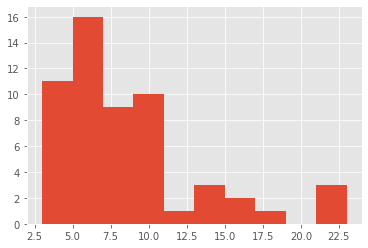
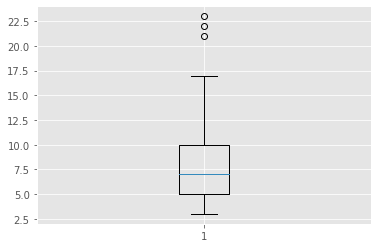
- Q3. Repeat Q1 and Q2 for Hillary Clinton.
- Q4. What are your observations based on the two histograms and boxplots. 

Donald Trump


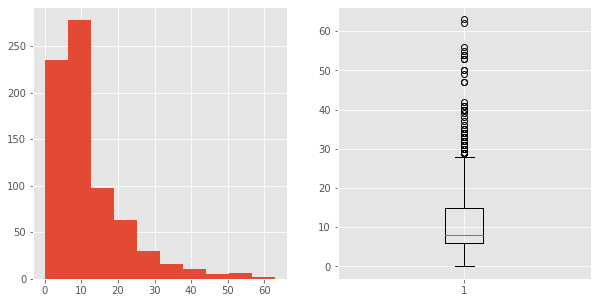

Hillary Clinton


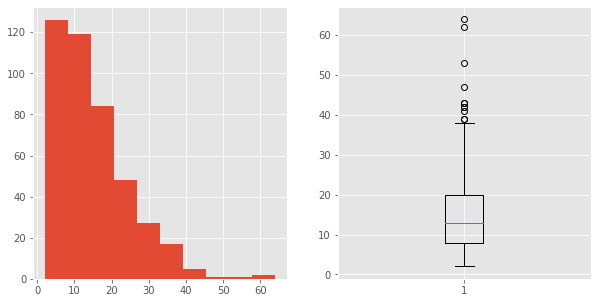

Q4: These charts suggest that both speakers spoke in shorter sentences on average. It looks like the majority of Clintons may have been slightly longer, but not by much, and neither got a chance to go off on long-winded answers very often. To me, this suggests that they were interrupting each other, and attempting to talk over each other very frequently.


In [ ]:
d_sentences_length = []
h_sentences_length = []

for sentence in d_sentences:
  wordcount = len(sentence.split())
  d_sentences_length.append(wordcount)

print('Donald Trump')
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
list = d_sentences_length
plt.subplot(1,2,1) # row = 1, column = 2, draw in first position
plt.hist(list)
plt.subplot(1,2,2) # row = 1, column = 2, draw in second position
plt.boxplot(list)
plt.show()

for sentence in h_sentences:
  wordcount = len(sentence.split())
  h_sentences_length.append(wordcount)

print('Hillary Clinton')
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
list = h_sentences_length
plt.subplot(1,2,1) # row = 1, column = 2, draw in first position
plt.hist(list)
plt.subplot(1,2,2) # row = 1, column = 2, draw in second position
plt.boxplot(list)
plt.show()

print('Q4: These charts suggest that both speakers spoke in shorter sentences on average. It looks like the majority of Clintons may have been slightly longer, but not by much, and neither got a chance to go off on long-winded answers very often. To me, this suggests that they were interrupting each other, and attempting to talk over each other very frequently.')

## Sentiment Analysis [12]
**TextBlob** is a popular Python package for sentiment analysis. Below is a snippet about how to install and use TextBlob to detect the sentiment of a sentence. For example, the following sentence gets a positive sentiment score 0.39167. Any score below 0 indicates a negative sentiment. 

```
pip install -U textblob
from textblob import TextBlob
sentence = "Textblob is amazingly simple to use. What great fun!"
sentiment = TextBlob(sentence).sentiment.polarity
print(sentiment)
```

- Q1. For each sentence in `D_Sentences`, use TextBlob to measure sentiment. Store the sentiment scores in a list named `D_Sentiments`.
- Q2. Repeat Q1 for `H_Sentences`.
- Q3. Draw boxplots using `D_Sentiments` and `H_Sentiments`. 
- Q4. What are your observations from these two boxplots?
- Q5. What is the average sentiment of the sentences from `D_Sentences` that contain either `Clinton` or `Hillary`.
- Q6. What is the average sentiment of the sentences from `H_Sentences` that contain either `Trump` or `Donald`.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 4.1 MB/s 
  Attempting uninstall: textblob
    Found existing installation: textblob 0.15.3
    Uninstalling textblob-0.15.3:
      Successfully uninstalled textblob-0.15.3
Donald Trump


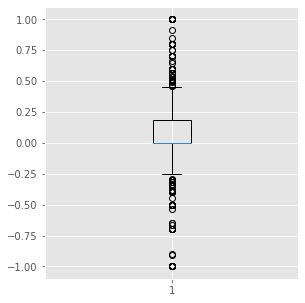

Hillary Clinton


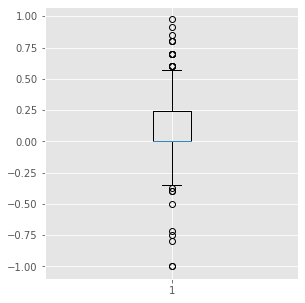

It looks like, again, there was not a huge difference in sentiment between the candidates. Hillarys average got up a little higher than Trumps, but her lows trended lower as well.


In [ ]:
!pip install -U textblob
from textblob import TextBlob

d_sentiment = []
h_sentiment = []

for sentence in d_sentences:
  sentiment = TextBlob(sentence).sentiment.polarity
  d_sentiment.append(sentiment)
  
for sentence in h_sentences:
  sentiment = TextBlob(sentence).sentiment.polarity
  h_sentiment.append(sentiment)

print('Donald Trump')
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
list = d_sentiment
plt.subplot(1,2,1)
plt.boxplot(list)
plt.show()

print('Hillary Clinton')
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
list = h_sentiment
plt.subplot(1,2,1)
plt.boxplot(list)
plt.show()

print('It looks like, again, there was not a huge difference in sentiment between the candidates. Hillarys average got up a little higher than Trumps, but her lows trended lower as well.')

In [ ]:
d_h_sentences = []
hilwords = ['Hillary','Clinton']
d_h_sentiment = []
d_h_sentiment_total = 0

for sentence in d_sentences:
  for word in hilwords:
    if word in sentence:
      d_h_sentences.append(sentence)

for sentence in d_h_sentences:
  sentiment = TextBlob(sentence).sentiment.polarity
  d_h_sentiment.append(sentiment)

for sentiment in d_h_sentiment:
  d_h_sentiment_total += sentiment

print('Average sentiment for Donald speaking of Hillary was',d_h_sentiment_total/len(d_h_sentiment))

h_d_sentences = []
donwords = ['Donald','Trump']
h_d_sentiment = []
h_d_sentiment_total = 0

for sentence in h_sentences:
  for word in donwords:
    if word in sentence:
      h_d_sentences.append(sentence)

for sentence in h_d_sentences:
  sentiment = TextBlob(sentence).sentiment.polarity
  h_d_sentiment.append(sentiment)

for sentiment in h_d_sentiment:
  h_d_sentiment_total += sentiment

print('Average sentiment for Hillary speaking of Donald was',h_d_sentiment_total/len(h_d_sentiment))

Average sentiment for Donald speaking of Hillary was 0.07023535954785957
Average sentiment for Hillary speaking of Donald was 0.1062057892917268


## Exploratory Analysis [5]

Write a function that takes a last name as input and returns a dictionary of most frequent 15 words and their frequencies spoken by that named person. Only consider the words that are at least 5 characters long. 

Then, call the function to compare the most frequent words spoken by `Trump` and `Clinton`.

In [ ]:
#import ordereddict
from collections import OrderedDict

In [ ]:
#list of words
d_allwords = []
h_allwords = []

for sentence in d_sentences:
  d_allwords.extend(sentence.split())
for sentence in h_sentences:
  h_allwords.extend(sentence.split())

def word_frequency_count(listx):
  wordlist = {}
  for word in listx:
    word = word.lower()
    if len(word) > 5:
      if word == "donald" or word == "trump:" or word == "hillary" or word == "clinton:":
          pass
      elif word not in wordlist.keys():
          wordlist[word] = 1
      else:
          wordlist[word] += 1
    else:
      continue   
  return wordlist

def final_word_count(speaker):
  if speaker == "Trump":
    return word_frequency_count(d_allwords)
  elif speaker == "Clinton":
    return word_frequency_count(h_allwords)
  else:
    return "Speaker not found."



In [ ]:
import pandas as pd

In [ ]:
Trump_d = final_word_count('Trump')
Clinton_d = final_word_count('Clinton')


trump_ind = range(0,1020)
trump_predict = {'word' : Trump_d.keys(),
                 'frequency' : Trump_d.values()}

clinton_ind = range(0,1062)
clinton_predict = {'word' : Clinton_d.keys(),
                   'frequency' : Clinton_d.values()}

trump_top15 = pd.DataFrame(trump_predict,index=trump_ind).sort_values(by = 'frequency', ascending = False).head(15)
clinton_top15 = pd.DataFrame(clinton_predict,index=clinton_ind).sort_values(by = 'frequency', ascending = False).head(15)
print('TRUMP')
print(trump_top15)
print('CLINTON')
print(clinton_top15)

TRUMP
          word  frequency
16     because         58
3      they're         40
72      that's         29
6      country         27
179     people         25
137     should         25
119  secretary         25
125     really         18
155     you're         17
120    clinton         15
57   companies         15
105     things         14
235    against         14
293    believe         14
2     country.         13
CLINTON
          word  frequency
48      people         28
31     because         24
104     that's         23
8       really         19
45      should         15
911    nuclear         11
254   american         11
120   business         10
167    million          9
9      country          8
71   important          8
512     police          8
112   actually          8
47     support          7
143     middle          7


It looks like the most common words for both debaters were stop words, which we will address in the final question. However, if we leave those out in this initial analysis, it looks like Trump spent a lot more time speaking about Secretary Clinton, and addressing her directly ('you're', 'clinton', etc.), while it appears that Clinton tried to talk more about the issues ('business', 'police', 'nuclear', etc).

## Stopwords and Visualization [5 + 5 + 5]

Write a function that takes a string, removes the stopwords, and then returns the modified string. Here is the list of stopwords https://gist.github.com/sebleier/554280.

In [ ]:
stopwords = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"]

In [ ]:
input = input("Type a sentence:")

def remove_stopwords(sentence):
  newsent = sentence.lower().split()
  nostop = []
  for word in newsent:
    if word in stopwords:
      continue
    else:
      nostop += [word]
  final = ' '.join(nostop)
  print(final)

remove_stopwords(input)

Type a sentence:Jon John Naeemul about by the bicycle between accordance
Jon John Naeemul bicycle


Write a function named `draw_wordcloud` that takes a last name as input and draws a wordcloud with the 50 most frequent words spoken by the named person. Do not consider stopwords. Use the above defined function to remove the stopwords. Only consider words that are atleast 5 characters long. A sample code for drawing wordclouds is given below.

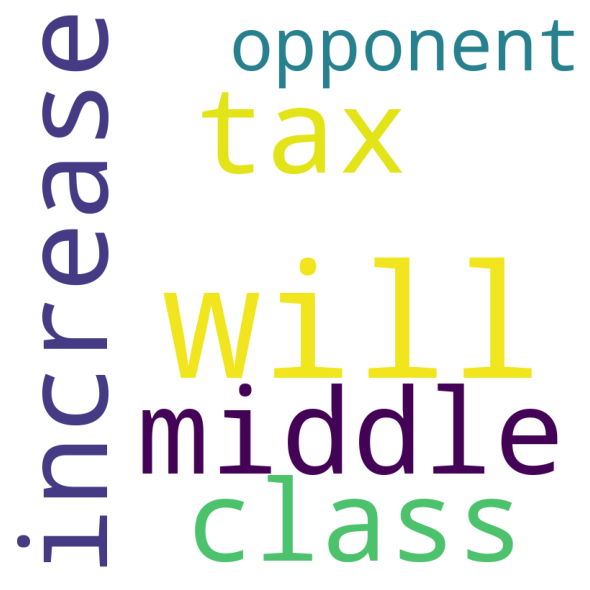

In [59]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
  
words = 'i will not increase tax for the middle class. but my opponent will.'
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                min_font_size = 3).generate(words) 
                     
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [73]:
trump_df = pd.DataFrame(trump_predict,index=trump_ind).sort_values(by = 'frequency', ascending = False)
trump_stops = trump_df[~trump_df['word'].isin(stopwords)].head(50)
trump_viz = trump_stops['word'].astype(str)
trump_string = ''
for word in trump_viz:
  trump_string += word + ' '

clinton_df = pd.DataFrame(clinton_predict,index=clinton_ind).sort_values(by = 'frequency', ascending = False)
clinton_stops = clinton_df[~clinton_df['word'].isin(stopwords)].head(50)
clinton_string = ''
for word in trump_viz:
  clinton_string += word + ' '

def wordcloud_maker(string):
  wordcloud = WordCloud(width = 800, height = 800, 
                  background_color ='white',
                  min_font_size = 3).generate(string) 
                      
  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
  plt.show()

Call the `draw_wordcloud` function to compare the wordclouds of `Trump` and `Clinton`. Explain your two most interesting observations from the visualizations.

TRUMP


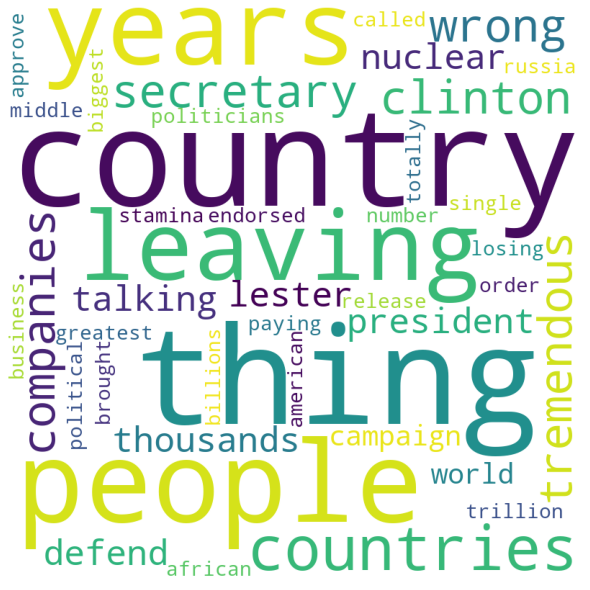

CLINTON


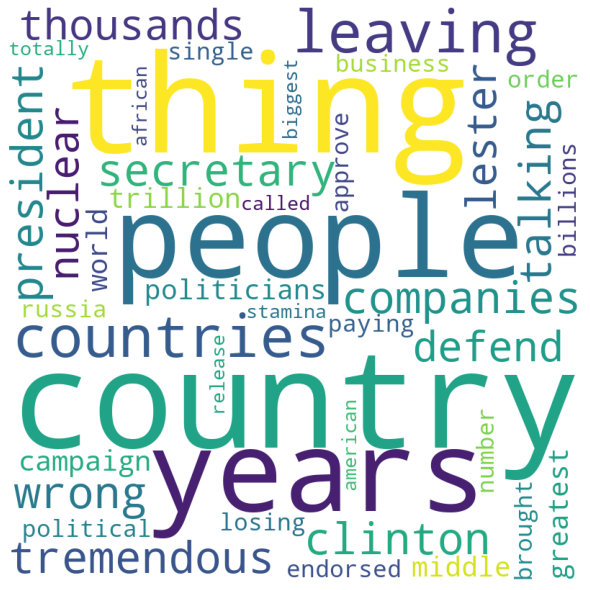

In [74]:
print('TRUMP')
wordcloud_maker(trump_string)
print('CLINTON')
wordcloud_maker(clinton_string)

I think it's very funny for Trump's signature language to feature so prominently in his wordcloud - "losing," "wrong," "tremendous" and others all make appearances. Beyond that, both candidates keep harping on the "country" and Americans. Also, the word cloud shows us that, while we already knew that Trump talked directly about Clinton in the debate, Clinton also talked about herself and her exploits at length, as evidenced by the appearance of "secretary" in her wordcloud.